In [1]:
from tnia.simulation.phantoms import add_sphere3d
from tnia.plotting.projections import show_xy_zy_max, show_xy_zy_slice
from tnia.simulation.phantoms import add_small_to_large, sphere_fits
import numpy as np
import random
import raster_geometry as rg
from skimage.io import imsave
from tnia.deconvolution.forward import forward

truth_path = r'D:\images\deep-learning\simulation1\train\ground truth'
input_path = r'D:\images\deep-learning\simulation1\train\input'


sdeconv 1.x.x detected
0.9999998


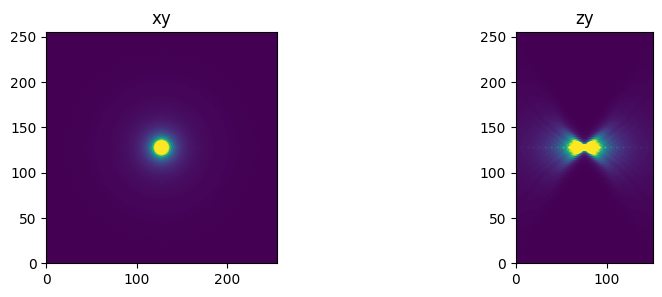

In [2]:
from tnia.deconvolution.psfs import gibson_lanni_3D

# scope parameters
ni=1.5
ns  = 1.33
NA=1.4
w=0.530

# apacings
xy_spacing = .1
z_spacing= .1

#depth to compute PSF this can be used to compute a PSF that has aberrations
#note stil need to confirm the sign of the depth, the negative sign is used to reproduce the experimental PSF
d=0

xy_psf_dim=255
z_psf_dim=151

psf  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_psf_dim, d, w)
psf = psf.astype('float32')

psf=psf/psf.sum()

fig=show_xy_zy_max(psf, vmax=psf.max()/100)
print(psf.sum())


34 200 191
9 163 207
158 47 93
22 153 199
146 95 87
155 124 23
110 167 244
31 161 62
131 113 1
99 38 248


c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  field_imaged = poisson(field_imaged.astype(float))
C:\Users\bnort\AppData\Local\Temp\ipykernel_37356\567972862.py:36: UserWarning: D:\images\deep-learning\simulation1\train\ground truth\phantom_sub0.tif is a low contrast image
  imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)


132 68 29
186 0 59
128 249 175
32 153 180
214 50 225
246 231 186
164 135 154
80 39 184
248 176 198
153 3 158


C:\Users\bnort\AppData\Local\Temp\ipykernel_37356\567972862.py:36: UserWarning: D:\images\deep-learning\simulation1\train\ground truth\phantom_sub1.tif is a low contrast image
  imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)


32 237 69
28 140 187
50 183 22
123 195 107
75 231 149
86 96 149
66 121 22
116 65 153
124 115 256
144 13 236


C:\Users\bnort\AppData\Local\Temp\ipykernel_37356\567972862.py:36: UserWarning: D:\images\deep-learning\simulation1\train\ground truth\phantom_sub2.tif is a low contrast image
  imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)


133 11 80
205 79 244
21 68 101
42 179 40
191 183 52
166 123 196
8 91 78
199 92 227
201 172 25
65 217 226


C:\Users\bnort\AppData\Local\Temp\ipykernel_37356\567972862.py:36: UserWarning: D:\images\deep-learning\simulation1\train\ground truth\phantom_sub3.tif is a low contrast image
  imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)


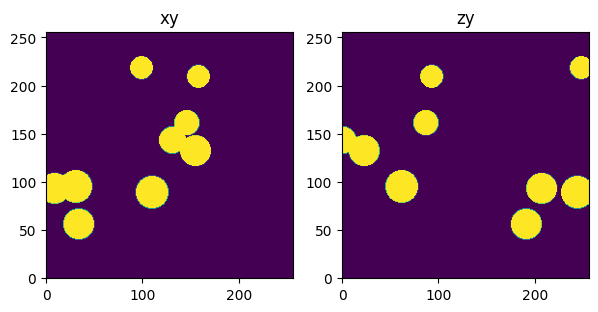

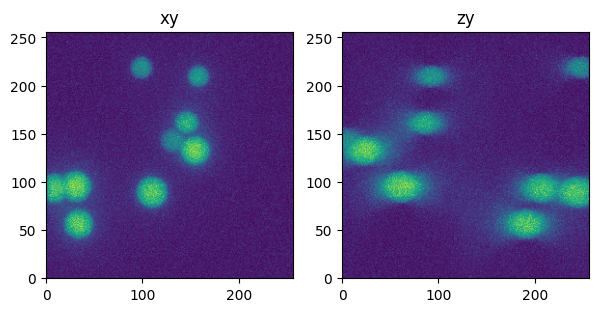

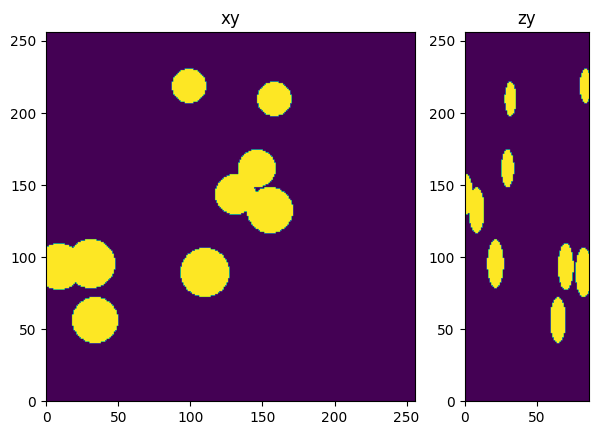

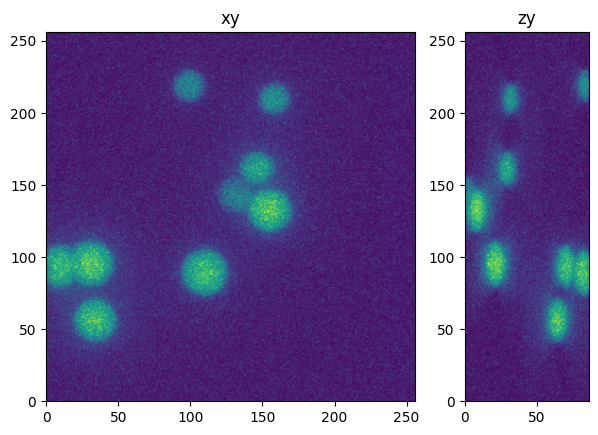

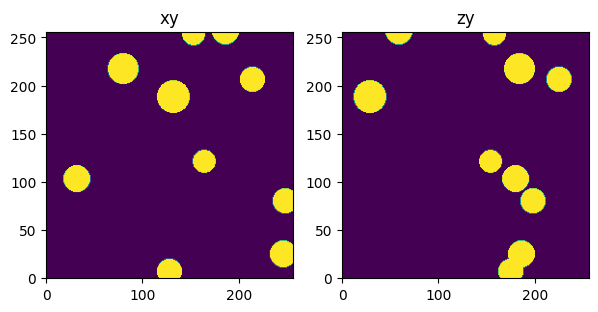

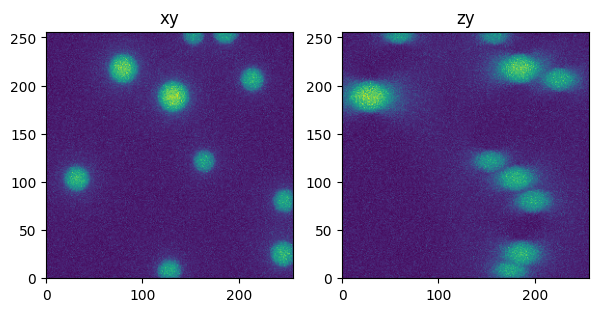

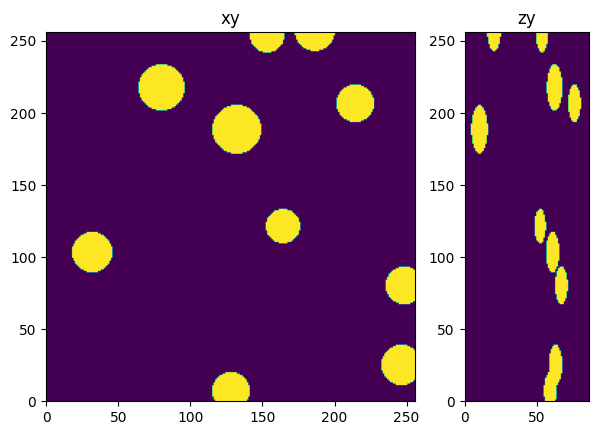

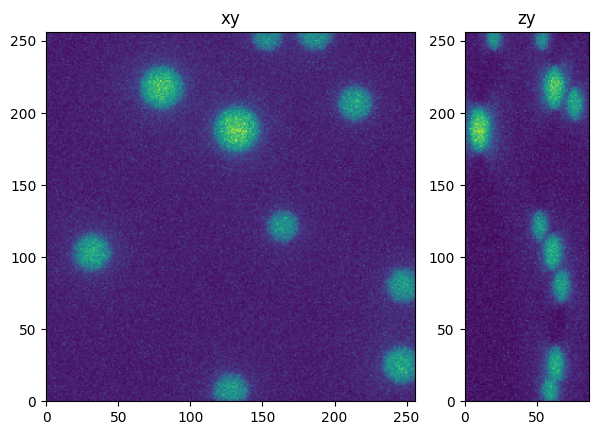

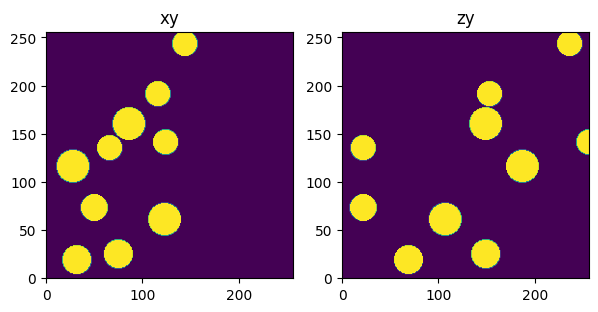

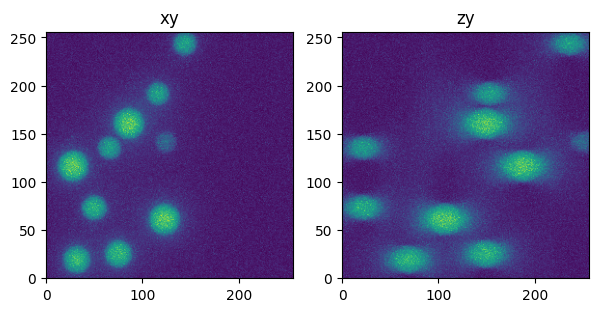

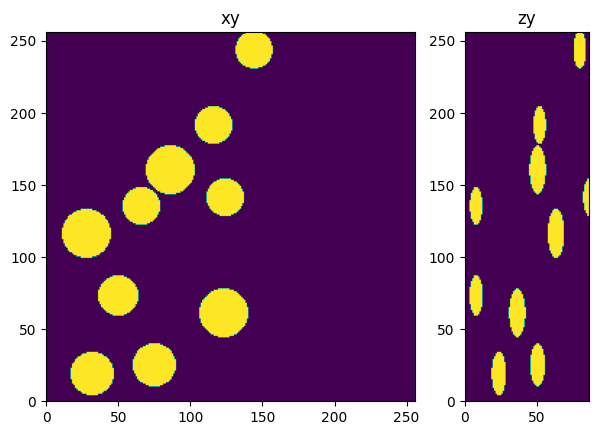

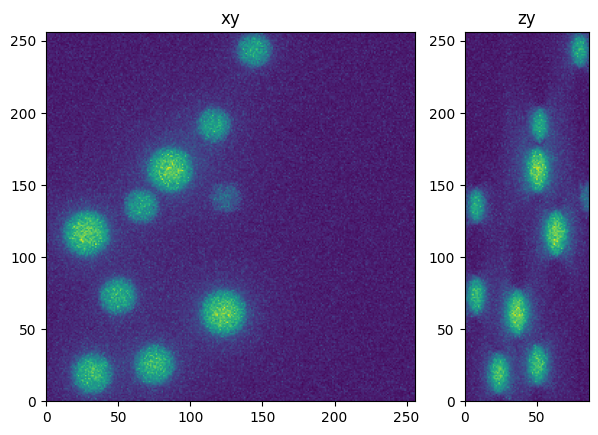

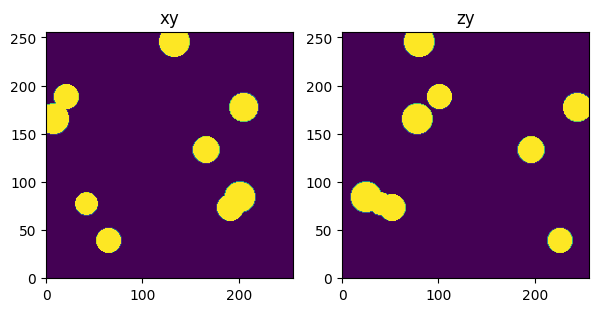

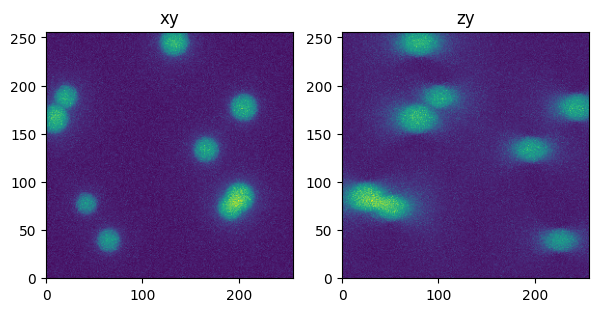

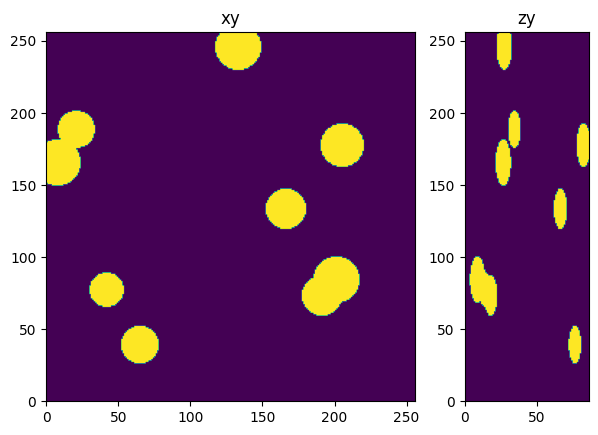

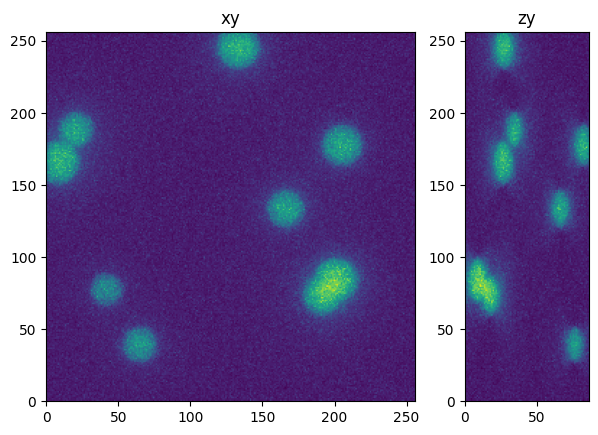

In [3]:

xdim=256
ydim=256
zdim=256


for n in range(0,4):

    phantom = np.zeros([zdim,xdim,ydim], dtype=np.float32)
    
    for i in range(0,10):
        x=random.randint(0,xdim)
        y=random.randint(0,ydim)
        z=random.randint(0,zdim)
        intensity = 200#random.randint(100,200) 

        print(x,y,z)

        r=random.randint(12,17)

        size = [2*r, 2*r, 2*r]
        sphere = rg.sphere(size, r).astype(np.float32)

        #add_sphere3d(phantom, 20, x, y, z, intensity, 2)
        add_small_to_large(phantom, intensity*sphere, x, y, z, True)

    phantom_forward = forward(phantom, psf, 10, True)
    sub_sample = 3
    phantom_sub = phantom[::sub_sample,:,:]
    phantom_forward_sub = phantom_forward[::sub_sample,:,:]

    fig=show_xy_zy_max(phantom, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward, figsize=(7,5))
    fig = show_xy_zy_max(phantom_sub, figsize=(7,5))
    fig = show_xy_zy_max(phantom_forward_sub, figsize=(7,5))

    imsave(truth_path + '\phantom_sub'+str(n)+'.tif', phantom_sub)
    imsave(input_path + '\phantom_forward_sub'+str(n)+'.tif', phantom_forward_sub)

c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  field_imaged = poisson(field_imaged.astype(float))


In [53]:
phantom_forward_sub.shape

(86, 256, 256)